In [1]:
# to read cobaya input files
from cobaya.yaml import yaml_load_file

# to run the sampler/minimizer
from cobaya.run import run as cobayaRun

# to load MCMC chains
from getdist import loadMCSamples, plots

# to analyze the chains
# from getdist.mcsamples import MCSamplesFromCobaya
%matplotlib inline
import matplotlib.pyplot as plt
import getdist.plots as gdplt

import sys

import numpy as np

# Load the Planck samples

In [2]:
pathDir = "../../data/planck_chains_2018/COM_CosmoParams_fullGrid_R3.01/"
runParams = "base"
runData = "plikHM_TTTEEE_lowl_lowE"

runPath = pathDir + runParams + "/" + runData + "/base_" + runData


# pathMinimum = runPath + ".minimum"
# pathParamName = runPath + ".paramname"
# pathSamples1 = runPath + "_1.txt"

In [3]:
samplesPlanck = loadMCSamples(runPath)

# Load the DES samples

In [4]:
runParams = "base"
runData = "DES_DESpriors"

runPath = pathDir + runParams + "/" + runData + "/base_" + runData

In [5]:
samplesDES = loadMCSamples(runPath)

In [6]:
# loadMCSamples?

# Take a look!

In [7]:
# from getdist import plots
# g = plots.get_single_plotter()
# g.plot_2d(samplesDES, ['omegam', 'sigma8'])

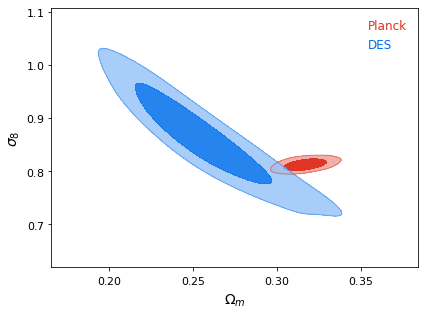

In [8]:
g = plots.get_single_plotter()
g.plot_2d([samplesPlanck, samplesDES], ['omegam', 'sigma8'], filled=True)
g.add_legend(['Planck', 'DES'], colored_text=True)
# g.export('output_file.pdf')

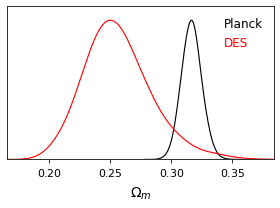

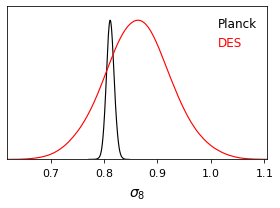

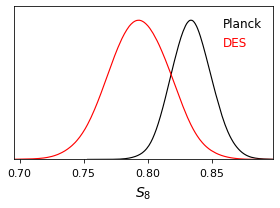

In [9]:
# Show the Omega_m tension
g = plots.get_single_plotter(width_inch=4)
g.plot_1d([samplesPlanck, samplesDES], 'omegam', normalized=False)
# g.add_legend(['Planck', 'DES'], colored_text=False, legend_loc='upper right')
g.add_legend(['Planck', 'DES'], colored_text=True, legend_loc='upper right')

# sigma_8 is consistent 
g = plots.get_single_plotter(width_inch=4)
g.plot_1d([samplesPlanck, samplesDES], 'sigma8', normalized=False)
g.add_legend(['Planck', 'DES'], colored_text=True, legend_loc='upper right')

# S8 is consistent 
g = plots.get_single_plotter(width_inch=4)
g.plot_1d([samplesPlanck, samplesDES], 'S8', normalized=False)
g.add_legend(['Planck', 'DES'], colored_text=True, legend_loc='upper right')

# Assess the $\Omega_m$ tension

In [10]:
# Default limits are 1: 68%, 2: 95%, 3: 99% probability enclosed
# See  https://getdist.readthedocs.io/en/latest/analysis_settings.html
# and examples for below for changing analysis settings 
# (e.g. 2hidh limits, and how they are defined)

print("From Planck:")
print(samplesPlanck.getInlineLatex('omegam',limit=1))

print("From DES:")
print(samplesDES.getInlineLatex('omegam',limit=1))

From Planck:
\Omega_m = 0.3166\pm 0.0084
From DES:
\Omega_m = 0.256^{+0.023}_{-0.031}


# Explore what can be output from the samples

((0.28432628017159195, 0.35043421982840806),
 (0.7825730836034318, 0.8418888163965682))

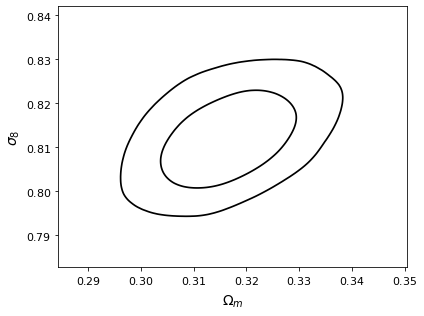

In [11]:
g = plots.get_single_plotter()
g.plot_2d(samplesPlanck, ['omegam', 'sigma8'])

Get the list of parameters

In [60]:
parNamesPlanck = samplesPlanck.getParamNames()
print(parNamesPlanck)

Look at one of the parameters

In [61]:
paramIndices = samplesPlanck._getParamIndices()
print("Param index for omegam: " + str(paramIndices['omegam']))
print("Param index for sigma8: " + str(paramIndices['sigma8']))
iPar = iParOmegam

Param index for omegam: 29
Param index for sigma8: 32


In [14]:
print("name: " + parNamesPlanck.names[iPar].name)
print("label: " + parNamesPlanck.names[iPar].label)
print("isDerived: " + str(parNamesPlanck.names[iPar].isDerived))
print("comment: " + parNamesPlanck.names[iPar].comment)
print("number: " + str(parNamesPlanck.names[iPar].number))

name: omegam
label: \Omega_m
isDerived: True
comment: 
number: None


Get some relevant info about the parameter considered

In [46]:
# maxLike = samplesPlanck.getBestFit(max_posterior=False)
maxPost = samplesPlanck.getBestFit(max_posterior=True)
maxPostDict = maxPost.getParamDict()
print("Best fit Omega_m "+str(maxPostDict["omegam"]))

Best fit Omega_m 0.3157967


In [15]:
print("Mean: " + str(samplesPlanck.getMeans([iPar])))

Mean: [0.31655132]


In [16]:
print("Hard lower bound: " + str(samplesPlanck.getLower(parNamesPlanck.names[iPar].name)))
print("Hard upper bound: " + str(samplesPlanck.getUpper(parNamesPlanck.names[iPar].name)))

Hard lower bound: 0.0
Hard upper bound: None


In [17]:
# maxLike = samplesPlanck.getBestFit(max_posterior=False)
maxPost = samplesPlanck.getBestFit(max_posterior=True)
margeStats = samplesPlanck.getMargeStats(include_bestfit=True)
likeStats = samplesPlanck.getLikeStats()
table = samplesPlanck.getTable(columns=1, include_bestfit=False)
latex = samplesPlanck.getLatex(params=None, limit=1, err_sig_figs=None)
samplesPlanck.getInlineLatex(parNamesPlanck.names[iPar].name, limit=1, err_sig_figs=None)

'\\Omega_m = 0.3166\\pm 0.0084'

In [18]:
parPlanck = samplesPlanck.getParams()

Look at the actual samples for chosen variables

In [19]:
parPlanck.omegabh2, parPlanck.omegam, parPlanck.sigma8

(array([0.02216658, 0.02218979, 0.02209695, ..., 0.02228083, 0.02233994,
        0.02226424]),
 array([0.3240058, 0.3211981, 0.3219191, ..., 0.3176779, 0.3164991,
        0.326489 ]),
 array([0.8079056, 0.8051798, 0.7983605, ..., 0.8026571, 0.8065764,
        0.8148396]))

Compute confidence limits / quantiles

In [20]:
samplesPlanck.confidence(parPlanck.omegam, 0., upper=False, start=0, end=None, weights=None), \
samplesPlanck.confidence(parPlanck.omegam, 0.05, upper=False, start=0, end=None, weights=None), \
samplesPlanck.confidence(parPlanck.omegam, 0.5, upper=False, start=0, end=None, weights=None), \
samplesPlanck.confidence(parPlanck.omegam, 0.95, upper=False, start=0, end=None, weights=None), \
samplesPlanck.confidence(parPlanck.omegam, 1., upper=False, start=0, end=None, weights=None)

(0.28441, 0.3028564, 0.3164858, 0.3307111, 0.3516251)

Compare with the best fit (posterior maximum)

In [21]:
samplesPlanck.getInlineLatex(parNamesPlanck.names[iParOmegam].name, limit=1, err_sig_figs=None)

'\\Omega_m = 0.3166\\pm 0.0084'

# Select only the samples with low $\Omega_m$

Keep only some of the samples

In [22]:
# fraction of samples to keep
frac = 0.05

# corresponding quantile
qOmegam = samplesPlanck.confidence(parPlanck.omegam, frac, upper=False, start=0, end=None, weights=None)

# samples to keep
I = np.where(parPlanck.omegam <= qOmegam)[0]
print(I)

[   14    15    76 ... 24386 24432 24433]


In [23]:
# keep only the desired samples
cutSamplesPlanck = samplesPlanck.copy()
cutSamplesPlanck.filter(I)

Plot to check this worked

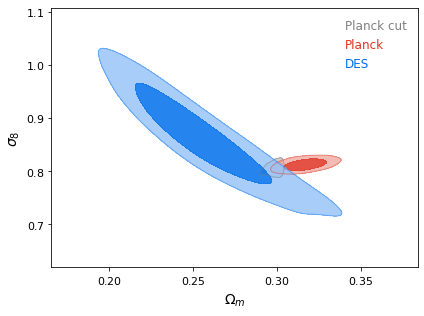

In [24]:
g = plots.get_single_plotter()
g.plot_2d([cutSamplesPlanck, samplesPlanck, samplesDES], ['omegam', 'sigma8'], filled=True)
g.add_legend(['Planck cut', 'Planck', 'DES'], colored_text=True)
# g.export('output_file.pdf')

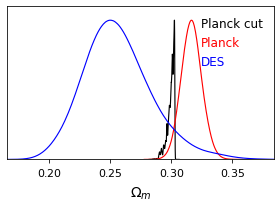

In [51]:
# Show the Omega_m tension
g = plots.get_single_plotter(width_inch=4)
g.plot_1d([cutSamplesPlanck, samplesPlanck, samplesDES], 'omegam', normalized=False)
# g.add_legend(['Planck', 'DES'], colored_text=False, legend_loc='upper right')
g.add_legend(['Planck cut', 'Planck', 'DES'], colored_text=True, legend_loc='upper right')

In [31]:
samplesPlanck.getInlineLatex(parNamesPlanck.names[iParOmegam].name, limit=1, err_sig_figs=None)

'\\Omega_m = 0.3166\\pm 0.0084'

In [32]:
cutSamplesPlanck.getInlineLatex(parNamesPlanck.names[iParOmegam].name, limit=1, err_sig_figs=None)

'\\Omega_m = 0.2995^{+0.0034}_{-0.0012}'

The maximum posterior or likelihood somehow cannot be computed from the chains alone...
Cobaya returns the quantity it reads in the bestfit file, regardless of the changes I make to the samples.

In [50]:
maxPost = cutSamplesPlanck.getBestFit(max_posterior=True)
maxPostDict = maxPost.getParamDict()
print("Best fit Omega_m "+str(maxPostDict["omegam"]))

Best fit Omega_m 0.3157967


In [48]:
maxPost = samplesPlanck.getBestFit(max_posterior=True)
maxPostDict = maxPost.getParamDict()
print("Best fit Omega_m "+str(maxPostDict["omegam"]))

Best fit Omega_m 0.3157967


However, the mean posterior works!

In [66]:
print("Mean: " + str(samplesPlanck.getMeans()[iPar]))
print("Mean from cut chain: " + str(cutSamplesPlanck.getMeans()[iPar]))

print("Var: " + str(samplesPlanck.getVars()[iPar]))
print("Var from cut chain: " + str(cutSamplesPlanck.getVars()[iPar]))

Mean: 0.3165513173022818
Mean from cut chain: 0.29951695547498175
Var: 7.093164768065323e-05
Var from cut chain: 9.184513595682499e-06


Convert the array of means to a dictionary

In [84]:
# meansCut = samplesPlanck.getMeans()
# paramIndices = samplesPlanck._getParamIndices()

# meansCutDict = {}
# for key in paramIndices.keys():
#     iPar = paramIndices[key]
#     if not parNamesPlanck.names[iPar].isDerived:
#         meansCutDict[key] = meansCut[iPar]

# print(meansCutDict.keys())

In [102]:
# fiducial_params.keys()

dict_keys(['ombh2', 'omch2', 'H0', 'tau', 'As', 'ns'])

In [99]:
# meansCut = samplesPlanck.getMeans()

# keys = ['omegabh2', 'omegach2', 'theta', 'tau', 'logA', 'ns']

# paramIndices = samplesPlanck._getParamIndices()

# meansCutDict = {}
# for key in keys:
#     iPar = paramIndices[key]
#     meansCutDict[key] = meansCut[iPar]

# print(meansCutDict)  

{'omegabh2': 0.022359750239422042, 'omegach2': 0.12020023642700257, 'theta': 1.040903573886841, 'tau': 0.054445094400537256, 'logA': 3.044735218293368, 'ns': 0.9648574419923404}


In [103]:
meansCut = samplesPlanck.getMeans()
paramIndices = samplesPlanck._getParamIndices()

meansCutDict = {}
for key in paramIndices.keys():
    iPar = paramIndices[key]
#     if not parNamesPlanck.names[iPar].isDerived:
    meansCutDict[key] = meansCut[iPar]

print(meansCutDict.keys())

dict_keys(['omegabh2', 'omegach2', 'theta', 'tau', 'logA', 'ns', 'calPlanck', 'acib217', 'xi', 'asz143', 'aps100', 'aps143', 'aps143217', 'aps217', 'aksz', 'kgal100', 'kgal143', 'kgal143217', 'kgal217', 'galfTE100', 'galfTE100143', 'galfTE100217', 'galfTE143', 'galfTE143217', 'galfTE217', 'cal0', 'cal2', 'H0', 'omegal', 'omegam', 'omegamh2', 'omegamh3', 'sigma8', 'S8', 's8omegamp5', 's8omegamp25', 's8h5', 'rdragh', 'rmsdeflect', 'zrei', 'A', 'clamp', 'DL40', 'DL220', 'DL810', 'DL1420', 'DL2000', 'ns02', 'yheused', 'YpBBN', 'DHBBN', 'age', 'zstar', 'rstar', 'thetastar', 'DAstar', 'zdrag', 'rdrag', 'kd', 'thetad', 'zeq', 'keq', 'thetaeq', 'thetarseq', 'Hubble015', 'DM015', 'Hubble038', 'DM038', 'Hubble051', 'DM051', 'Hubble061', 'DM061', 'Hubble233', 'DM233', 'fsigma8z015', 'sigma8z015', 'fsigma8z038', 'sigma8z038', 'fsigma8z051', 'sigma8z051', 'fsigma8z061', 'sigma8z061', 'fsigma8z233', 'sigma8z233', 'f2000_143', 'f2000_x', 'f2000_217', 'chi2_simall', 'chi2_lowl', 'chi2_plik', 'chi2_pri

In [108]:
fiducial_params = {
    'ombh2': meansCutDict['omegabh2'], 
    'omch2': meansCutDict['omegach2'], 
    'H0': meansCutDict['H0'], 
    'tau': meansCutDict['tau'],
    'As': meansCutDict['A'] * 1.e-9, 
    'ns': meansCutDict['ns']}

print(fiducial_params)

{'ombh2': 0.022359750239422042, 'omch2': 0.12020023642700257, 'H0': 67.27331189831374, 'tau': 0.054445094400537256, 'As': 2.1007130107640095e-09, 'ns': 0.9648574419923404}


# get Cl from the parameters

In [109]:
# fiducial_params = meansCutDict

# fiducial_params = {
#     'ombh2': 0.022, 'omch2': 0.12, 'H0': 68, 'tau': 0.07,
#     'As': 2.2e-9, 'ns': 0.96,
#     'mnu': 0.06, 'nnu': 3.046}

# fiducial_params = {
#     'ombh2': 0.022, 'omch2': 0.12, 'H0': 68, 'tau': 0.07,
#     'As': 2.2e-9, 'ns': 0.96}


packages_path = '/global/cscratch1/sd/eschaan/project_s8/code/cobaya_exploration/input/cobaya_packages'

info_fiducial = {
    'params': fiducial_params,
    'likelihood': {'one': None},
    'theory': {'camb': {"extra_args": {"num_massive_neutrinos": 1}}},
    'packages_path': packages_path}

l_max = 3000

from cobaya.model import get_model
model_fiducial = get_model(info_fiducial)

# Declare our desired theory product
# (there is no cosmological likelihood doing it for us)
model_fiducial.add_requirements({"Cl": {'tt': l_max}})

# Compute and extract the CMB power spectrum
# (In muK^-2, without l(l+1)/(2pi) factor)
# notice the empty dictionary below: all parameters are fixed
model_fiducial.logposterior({})
Cls = model_fiducial.provider.get_Cl(ell_factor=False, units="muK2")

# Our fiducial power spectrum
Cl_est = Cls['tt'][:l_max + 1]

print(Cl_est)

[prior] *WARNING* No sampled parameters requested! This will fail for non-mock samplers.


INFO:camb:Importing *auto-installed* CAMB (but defaulting to *global*).


[camb] Importing *auto-installed* CAMB (but defaulting to *global*).


INFO:camb:Initialized!


[camb] Initialized!
[0.00000000e+00 0.00000000e+00 1.06932892e+03 ... 1.92604490e-05
 1.92146041e-05 1.91686626e-05]


# Compare the CMB power spectrum for these samples VS the whole chain

Read the best fit Cl from the file provided in the Planck chains

In [25]:
pathDir = "../../data/planck_chains_2018/COM_CosmoParams_fullGrid_R3.01/"
runParams = "base"
runData = "plikHM_TTTEEE_lowl_lowE"

bestFitClPath = pathDir + runParams + "/" + runData + "/base_" + runData + ".minimum.theory_cl"

In [26]:
# The power spectra are listed as
# Dl = l*(l+1) * Cl / (2*np.pi) [muK^2]
# For the lensing deflection d:
# Dl^{dd} = (l*(l+1))^2 * Cl^{phi phi} / (2*np.pi)
ell, DTT, DTE, DEE, DBB, Ddd = np.genfromtxt(bestFitClPath).T

/global/homes/e/eschaan/.conda/envs/base3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  if sys.path[0] == '':


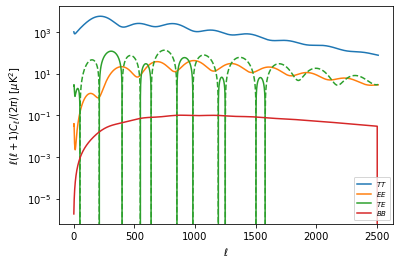

In [27]:
fig=plt.figure(0)
ax=fig.add_subplot(111)
#
ax.plot(ell, DTT, label=r'$TT$')
ax.plot(ell, DEE, label=r'$EE$')
plot=ax.plot(ell, DTE, label=r'$TE$')
ax.plot(ell, -DTE, ls='--', c=plot[0].get_color())
ax.plot(ell, DBB, label=r'$BB$')
# ax.plot(ell, Ddd)
#
ax.legend(loc=4, fontsize='x-small', labelspacing=0.1)
ax.set_yscale('log', nonposy='clip')
ax.set_xlabel(r'$\ell$')
ax.set_ylabel(r'$\ell(\ell+1) C_\ell / (2\pi)$ [$\mu$K$^2$]')


plt.show()

Compute the best fit Cl from the best fit parameters, as a check.

Compare the best fit Cl to the mean posterior Cl

Compare the mean posterior Cl with and without the $\Omega_m$ cut

# Attempts at evaluating CMB power spectra at one/each step of the chain

I need to generate a cobaya model object, with the same input parameters as were used to generate the chain.

Try to do it as a postprocessing on the cut chain?

In [28]:
# create a new info.yaml file as follows


# Path to the original sample
output: chains/planck

# Post-processing information
post:
  suffix: testmanu  # the new sample will be called "chains\planck_post_testmanu*"
  # If we want to skip the first third and take 1 every 3 samples
#   skip: 0.3
#   thin: 3
#  # Now let's add the DES likelihood,
#  # increase the precision (remember to repeat the extra_args)
#  # and add the new derived parameter
  add:
    likelihood:
      planck_2018_highl_plik.[TT|TTTEEE]:
      planck_2018_lowl.TT:
      planck_2018_lowl.EE:
    theory:
#       # Use *only* the theory corresponding to the original sample
#       classy:
#         extra_args:
#           # New precision parameter
#           # [option]: [value]
      camb:
        extra_args:
          # New precision parameter
          # [option]: [value]
    params:
#       # h = H0/100. (nothing to add: CLASS/CAMB knows it)
#       h:
#       # A dynamic derived parameter: sum of BAO chi-squared's
#       chi2__BAO:
#         derived: 'lambda chi2__sixdf_2011_bao, chi2__sdss_dr7_mgs, chi2__sdss_dr12_consensus_bao:
#                   sum([chi2__sixdf_2011_bao, chi2__sdss_dr7_mgs, chi2__sdss_dr12_consensus_bao])'
#         latex: \chi^2_\mathrm{BAO}

SyntaxError: invalid syntax (<ipython-input-28-ea4c123b81f3>, line 8)

In [ ]:
# Generate info dictionary
info = {
#     "likelihood": {},
#     "likelihood": {
#         "planck_2018_highl_plik.TTTEEE": None,
#         "planck_2018_lowl.TT": None,
#         "planck_2018_lowl.EE": None,
#     },
    "theory": {  
        "camb": None},
#     "params": dict([
#         ("a", {
#             "prior": {"min": -0.5, "max": 3},
#             "latex": r"\alpha"}),
#         ("b", {
#             "prior": {"dist": "norm", "loc": 0, "scale": 1},
#             "ref": 0,
#             "proposal": 0.5,
#             "latex": r"\beta"}),
#         ("derived_a", {
#             "latex": r"\alpha^\prime"}),
#         ("derived_b", {
#             "latex": r"\beta^\prime"})]),
#     "sampler": {
#         "mcmc": None},
#     "output": "output/cobaya/example1_gaussian/example1_gaussian"
}

In [ ]:
from cobaya.model import get_model


# Need to get the likelihood first
model = get_model(info)

In [ ]:
from cobaya.tools import load_packages_path_from_config_file, get_resolved_class

In [ ]:
load_packages_path_from_config_file?

In [ ]:
pathDir = "../../data/planck_chains_2018/COM_CosmoParams_fullGrid_R3.01/"
runParams = "base"
runData = "plikHM_TTTEEE_lowl_lowE"

infoPath = pathDir + runParams + "/" + runData + "/base_" + runData + ".inputparams"

In [ ]:
load_input?

In [ ]:
from cobaya.input import load_input

# info = yaml_load_file(infoPath)
info = load_input(infoPath)

In [ ]:
# info

In [ ]:
from cobaya.model import get_model


# Need to get the likelihood first
model = get_model(info)

In [ ]:
ombh2=model.likelihood.theory.get_param('ombh2')


halofit = model.likelihood.theory.camb.get_matter_power_interpolator(pars,
        nonlinear=True,hubble_units=True,k_hunit=True,kmax=kmax,
        var1=var,var2=var).P

pars =  model.likelihood.theory.camb.CAMBparams()
pars.set_cosmology(H0=model.likelihood.theory.get_param('H0'),
    ombh2=model.likelihood.theory.get_param('ombh2'),
    omch2=model.likelihood.theory.get_param('omch2'),
    nnu=model.likelihood.theory.get_param('nnu'),
    mnu=model.likelihood.theory.get_param('mnu'),
    num_massive_neutrinos=model.likelihood.theory.get_param('num_massive_neutrinos'))

from camb import model as CAMBModel
pars.NonLinear = CAMBModel.NonLinear_both